# **Explainable AI for Housing Markets: Rule-Based Analysis**


In the competitive real estate market, understanding what drives house prices is crucial for buyers, sellers, and policymakers. **Explainable AI (XAI)** transforms complex housing market data into interpretable insights, helping stakeholders make informed decisions based on transparent analysis rather than black-box predictions.

Imagine we're a real estate analyst trying to understand **why housing prices vary across California neighborhoods**. We want to identify the key factors that drive home values, determine which neighborhoods have similar price patterns, and explain to clients exactly what makes certain areas more valuable than others. Traditional machine learning models might predict prices accurately, but they rarely explain their reasoning.

In this analysis, we will be using **IBM AI Explainability 360 (AIX360)**, a comprehensive toolkit offering state-of-the-art explainability techniques for interpreting machine learning models. By applying GLRMExplainer with LinearRuleRegression to the California Housing dataset, we can identify clear rules that determine housing prices and visualize how individual features like median income, house age, and location contribute to property values.

Refer to the following links for detailed documentation and resources:

- [IBM AI Explainability 360 (AIX360)](https://github.com/Trusted-AI/AIX360/blob/master/examples/rbm/boston-linear.ipynb)
- [IBM AIX360 GitHub](https://github.com/Trusted-AI/AIX360)
- [IBM AIX360 Documentation](https://aix360.readthedocs.io/_/downloads/en/latest/pdf/)


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#Data-Exploration-and-Preprocessing">Data Exploration and Preprocessing</a>
        <ol>
            <li><a href="#Dataset-Description">Dataset-Description</a></li>
        </ol>
    </li>
    <li>
        <a href="#Dataset-Splitting-and-Sampling">Dataset Splitting and Sampling</a>
    </li>
    <li>
        <a href="#Model-Training-and-Evaluation">Model Training and Evaluation</a>
        <ol>
            <li><a href="#Feature-Binarization">Feature Binarization</a></li>
        </ol>
        <ol>
            <li><a href="#Linear-Rule-Regression">Linear Rule Regression</a></li>
        </ol>
        <ol>
            <li><a href="#GLRM-Explainer">GLRM Explainer</a></li>
        </ol>
    </li>
    <li>
        <a href="#Model-Explanation-and-Visualization">Model Explanation and Visualization</a>
        <ol>
            <li><a href="#Feature-Contribution-Visualization">Feature Contribution Visualization</a></li>
        </ol>
    </li>
</ol>


## <a id='objectives'></a>[Objectives](#toc)

In this project, we will work through the following steps to understand the California Housing dataset and apply explainable AI techniques to the problem of predicting housing prices:

1. **Set up the environment**: Install AIX360 and related tools for explainable AI (XAI) on the California Housing dataset.

2. **Preprocess the dataset**: Explore and prepare housing data using binarization and feature transformation techniques.

3. **Build and evaluate a regression model**: Train an interpretable rule-based model to predict housing prices across California.

4. **Implement rule-based explanations**: Use functions such as LinearRuleRegression to create transparent, human-readable rules that explain housing price predictions.

5. **Visualize feature contributions**: Create partial dependence plots to understand how individual features like median income, house age, and location affect housing values.

This project will equip us with practical skills to apply XAI techniques to real estate market analysis, making complex housing price factors transparent and interpretable.


----


## <a id='setup'></a>[Setup](#toc)


For this project, we will be using the following libraries:
*   [`pandas`](https://pandas.pydata.org/) for data manipulation and analysis of the California Housing dataset.
*   [`numpy`](https://numpy.org/) for numerical operations and array handling.
*   [`scikit-learn`](https://scikit-learn.org/stable/) for accessing the California Housing dataset and performing train-test splits.
*   [`matplotlib`](https://matplotlib.org/) for creating visualization plots of housing price predictions and feature contributions.
*   [`seaborn`](https://seaborn.pydata.org/) for enhanced statistical data visualizations and distribution plots.
*   [`aix360`](https://github.com/Trusted-AI/AIX360) for explainable AI tools, specifically FeatureBinarizer and GLRMExplainer.
*   [`cvxpy`](https://www.cvxpy.org/) for convex optimization required by the AIX360 rule-based models.


### <a id='installing-required-libraries'></a>[Installing Required Libraries](#toc)


In [1]:
# %pip install -q tqdm numpy pandas matplotlib seaborn scikit-learn
%pip install aix360==0.3.0 | tail -n 1
%pip install pandas==2.2.3 | tail -n 1
%pip install scikit-learn==1.6.1 | tail -n 1
%pip install cvxpy==1.6.0 | tail -n 1
%pip install seaborn==0.13.2 | tail -n 1

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### <a id='importing-required-libraries'></a>[Importing Required Libraries](#toc)

Import all required libraries here:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, max_error
from sklearn.datasets import fetch_california_housing
from aix360.algorithms.rbm import FeatureBinarizer
from aix360.algorithms.rbm import GLRMExplainer, LinearRuleRegression
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, max_error
from sklearn.model_selection import train_test_split

## <a id='data-exploration-and-preprocessing'></a>[Data Exploration and Preprocessing](#toc)

We use scikit-learn's built-in datasets module to load the California Housing dataset, which contains information about housing prices across different districts in California. We will now load the dataset using scikit-learn's `fetch_california_housing` function, convert it to a pandas DataFrame, and inspect the first few rows of the data.

To know more about the dataset, see the [California Housing documentation](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).


In [2]:
housing = fetch_california_housing(as_frame=True)

In [3]:
ca_housing_df = housing.data

In [4]:
ca_housing_df['MedHouseVal'] = housing.target

In [5]:
ca_housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### <a id='dataset-description'></a>[Dataset Description](#toc)

The California Housing dataset contains information about housing prices across different places in California. The data was derived from the 1990 U.S. Census and provides a rich source of information for analyzing factors influencing housing values.

The dataset includes various features related to location, population demographics, and housing characteristics, providing a comprehensive basis for real estate market analysis and price prediction.

| Column      | Type      | Description                                                  | Range/Units                               |
|-------------|-----------|--------------------------------------------------------------|------------------------------------------|
| MedInc      | Numerical | Median income in the block group                              | In tens of thousands of US Dollars       |
| HouseAge    | Numerical | Median house age in the block group                           | In years                                 |
| AveRooms    | Numerical | Average number of rooms per household                         | Count                                    |
| AveBedrms   | Numerical | Average number of bedrooms per household                      | Count                                    |
| Population  | Numerical | Block group population                                        | Count                                    |
| AveOccup    | Numerical | Average number of household members                           | Count                                    |
| Latitude    | Numerical | Block group latitude                                          | Geographic coordinate                    |
| Longitude   | Numerical | Block group longitude                                         | Geographic coordinate                    |
| MedHouseVal | Numerical | Median house value for households within the block group      | In hundreds of thousands of US Dollars   |

The target variable for our analysis will be **MedHouseVal (Median House Value)** because it represents the central tendency of home prices in each block group and serves as the outcome we aim to predict or understand using the other features.


The `info()` function provides a concise summary of the dataset, including the number of non-null entries, data types, and memory usage.


In [6]:
ca_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Let's examine the statistical summary of the California Housing dataset using the `describe()` method


In [7]:
ca_housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Missing values can occur in datasets and impact analysis. The `isnull()` function helps detect missing entries, and using `max(df.isnull().max())` returns `True` if any column has missing values and `False` otherwise, making it easier to check for their presence.


In [8]:
max(ca_housing_df.isnull().max())

False

Duplicate values can introduce redundancy and bias in analysis. Using `max(df.duplicated())` returns `True` if there are any duplicate rows in the dataset and `False` if there are none, providing a quick way to check for duplicates.


In [9]:
max(ca_housing_df.duplicated())

False

## <a id='dataset-splitting-and-sampling'></a>[Dataset Splitting and Sampling](#toc)

In this section, we prepare our data for model training by dividing it into training and testing sets. We then create a smaller subsample of the training data to improve computational efficiency while maintaining statistical representation. We validate the quality of our subsample by comparing its distribution to the full training set using statistical tests and visualization, ensuring our model will be built on a representative subset of the data.


First, we separate our features (X) from the target variable (MedHouseVal) that we aim to predict:


In [10]:
# Define feature matrix (X) and target vector (y)
X = ca_housing_df.drop(["MedHouseVal"], axis=1)  # Drop target column from features
y = ca_housing_df["MedHouseVal"] 

Now, we split the data into training (80%) and testing (20%) sets using scikit-learn's `train_test_split` function, then print the dimensions to confirm the split was done correctly.


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 31)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(16512, 8)
(16512,)
(4128, 8)
(4128,)


Since the dataset is relatively large and the rule-based models (which will be explained later) can be computationally intensive, we create a subsample of the training data to improve processing time while preserving the dataset's statistical properties.

Here, we will be performing `Random Sampling` using pandas' `sample()` method. Random sampling works like drawing names from a hat - every observation has an equal chance of being selected. For example, if we have 100 housing records numbered 1-100, and need a sample of 50, we might randomly pick numbers like 7, 23, 41, 88, etc. until we have 50 records. In our code, we're selecting 50% of our training data this way.

We perform this sampling only on the training set because the test set must remain untouched to provide an unbiased evaluation of our final model performance. Sampling the training data allows us to develop our model more efficiently while still having a clean, representative test set for proper validation.

By using this sampling approach, we can build our model on a smaller dataset that still maintains the essential patterns and relationships in the housing market data. This allows us to develop and test our interpretable AI models much faster without sacrificing their ability to understand what drives California housing prices.


In [12]:
subsample_fraction = 0.5  # Adjust this fraction as needed

X_train_sub = X_train.sample(frac=subsample_fraction, random_state=42)
Y_train_sub = Y_train.loc[X_train_sub.index]

print("Subsampled Training Set Shape:", X_train_sub.shape)

Subsampled Training Set Shape: (8256, 8)


The output confirms we've successfully created our subsample containing 8,256 housing records (50% of our training data) with all 8 feature columns.


To verify that our 50% random subsample accurately represents the full training data, we conducted three validation checks:

1. **Statistical Comparison**: We compared basic metrics (mean, standard deviation, median) of house values between our full training set and the subsample to confirm they were nearly identical, ensuring our subsample maintains the same central tendencies and variability.

2. **Distribution Test**: We applied the `Kolmogorov-Smirnov` test, which measures if two datasets follow the same distribution. Our high p-value (greater than 0.05) confirmed that the subsample and full dataset distributions are statistically indistinguishable.

3. **Visual Verification**: We created overlapping histograms showing both distributions, visually confirming that our subsample captures the same patterns, peaks, and tails as the full dataset.

These validation steps ensure that while we gain computational efficiency by using the smaller subsample, we aren't sacrificing the statistical integrity of our data. We can confidently proceed with the random subsample for our model building, knowing it  represents the patterns and relationships present in the full training dataset.


In [13]:
# Compare summary statistics
print("Full Training Set - Mean: {:.3f}, Std: {:.3f}, Median: {:.3f}".format(Y_train.mean(), Y_train.std(), Y_train.median()))
print("Random Subsample - Mean: {:.3f}, Std: {:.3f}, Median: {:.3f}".format(Y_train_sub.mean(), Y_train_sub.std(), Y_train_sub.median()))

Full Training Set - Mean: 2.072, Std: 1.156, Median: 1.798
Random Subsample - Mean: 2.070, Std: 1.150, Median: 1.813



KS Test Statistic: 0.006, p-value: 0.992


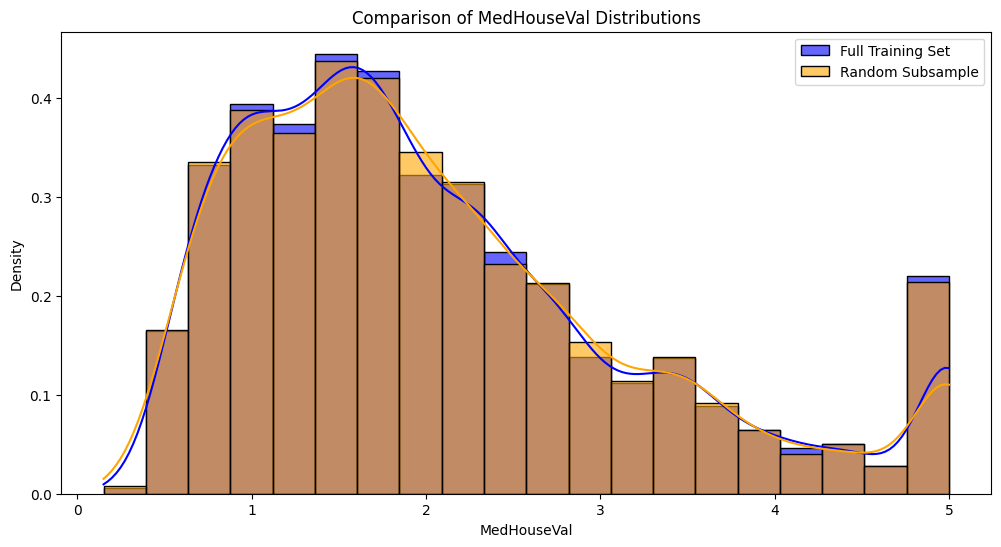

In [14]:
# Perform a KS test to compare distributions
ks_stat, p_value = ks_2samp(Y_train, Y_train_sub)
print("\nKS Test Statistic: {:.3f}, p-value: {:.3f}".format(ks_stat, p_value))

# Plot distributions
plt.figure(figsize=(12, 6))
sns.histplot(Y_train, bins=20, label='Full Training Set', color='blue', kde=True, stat='density', alpha=0.6)
sns.histplot(Y_train_sub, bins=20, label='Random Subsample', color='orange', kde=True, stat='density', alpha=0.6)
plt.title('Comparison of MedHouseVal Distributions')
plt.xlabel('MedHouseVal')
plt.ylabel('Density')
plt.legend()
plt.show()

The output confirms that our random sampling approach has successfully maintained the statistical properties of the original dataset:

1. The histogram shows near-perfect overlap between the distributions of the full training set (blue) and our random subsample (orange), with both capturing the same patterns.

2. The KS test results strongly support this visual observation, with a very low test statistic (0.006) and high p-value (0.992). This p-value is well above the typical threshold of 0.05, indicating there is no statistically significant difference between the two distributions.

Given these results, random sampling works perfectly fine for our use case, and we don't need to employ more complex sampling techniques such as stratified sampling (which maintains class proportions), systematic sampling (selecting every nth record), or cluster sampling (dividing data into groups and sampling whole groups). These alternative methods would be more appropriate if our data had strong imbalances or if specific subgroups needed special representation. However, our simple random sampling has successfully created a representative subsample that captures the full range and distribution of California housing values.


## <a id='model-training-and-evaluation'></a>[Model Training and Evaluation](#toc)

In this section, we build a transparent model that predicts housing prices by first converting continuous data (like income) into yes/no questions that can be used in simple rules. We then train a `rule-based model` that works similarly to how real estate agents develop "rules of thumb" for estimating property values, wrapped in an `explainer` that makes these rules visible and understandable. Finally, we test our model's accuracy on new data, demonstrating how this approach allows us to not only predict prices but also understand exactly why the model makes each prediction.


### <a id='feature-binarization'></a>[Feature Binarization](#toc)

The `FeatureBinarizer` transforms our continuous numerical features into a format that rule-based models can understand. Here's what it does:

- **Converts continuous values into binary conditions**: For example, instead of using raw median income values like "5.2," the binarizer creates conditions like "MedInc > 3.5" (True/False) or "MedInc ≤ 6.0" (True/False).

- **Creates negations**: With `negations=True`, we generate both conditions and their opposites. For instance, if we have "HouseAge > 20," we also get "HouseAge ≤ 20." This gives our model more flexibility in building rules.

- **Simplifies complex relationships**: Rather than trying to model the exact mathematical relationship between income and house prices (which might be non-linear), we break it into simple thresholds that are easier to interpret.

To understand this visually, imagine we have houses with different median incomes (3.2, 5.7, 8.1, etc.). The binarizer might create binary features like:
- MedInc > 3.0? (1 if true, 0 if false)
- MedInc > 4.5? (1 if true, 0 if false)
- MedInc > 6.0? (1 if true, 0 if false)

This binary representation enables our model to express rules in logical forms like Conjunctive Normal Form (CNF) or Disjunctive Normal Form (DNF). If you want to learn more about it read [this](https://www.geeksforgeeks.org/normal-and-principle-forms/).

The result is a model that can make predictions using logical rules like "If (median income is greater than 6.0) AND (house age is less than 30), then predict a higher house value." These rules are not only used for making predictions but also provide clear explanations of why a particular prediction was made, making the entire process transparent and understandable.


In [15]:
# Apply the FeatureBinarizer to the subsampled training set and full test set
fb = FeatureBinarizer(negations=True)

X_train_fb_sub = fb.fit_transform(X_train_sub)
X_test_fb = fb.transform(X_test)

In [16]:
X_train_fb_sub

MedInc                                                           \
           <=                                                            
       1.9167  2.3682  2.76365  3.1467  3.5332  3.9615  4.4601  5.1242   
10638       0       0        0       0       0       0       0       0   
961         0       0        0       0       0       0       0       0   
5435        0       0        0       0       0       1       1       1   
11332       0       0        0       0       0       0       0       1   
17638       0       0        0       0       0       0       0       0   
...       ...     ...      ...     ...     ...     ...     ...     ...   
18946       0       0        0       0       0       0       0       0   
12722       0       0        0       0       0       0       0       1   
15530       0       0        0       1       1       1       1       1   
10457       0       0        0       0       0       0       0       0   
7178        0       0        0       0       1       1       1       1   

                        ... Longitude                                          \
                     >  ...        <=       >                                   
       6.17875  1.9167  ...   -117.25 -122.29 -121.98 -121.37 -119.98 -118.51   
10638        1       1  ...         1       1       1       1       1       1   
961          1       1  ...         1       1       1       0       0       0   
5435         1       1  ...         1       1       1       1       1       1   
11332        1       1  ...         1       1       1       1       1       1   
17638        0       1  ...         1       1       1       0       0       0   
...        ...     ...  ...       ...     ...     ...     ...     ...     ...   
18946        0       1  ...         1       1       0       0       0       0   
12722        1       1  ...         1       1       1       0       0       0   
15530        1       1  ...         0       1       1       1       1       1   
10457        1       1  ...         1       1       1       1       1       1   
7178         1       1  ...         1       1       1       1       1       1   

                                      
                                      
      -118.3 -118.12 -117.88 -117.25  
10638      1       1       1       0  
961        0       0       0       0  
5435       0       0       0       0  
11332      1       1       0       0  
17638      0       0       0       0  
...      ...     ...     ...     ...  
18946      0       0       0       0  
12722      0       0       0       0  
15530      1       1       1       1  
10457      1       1       1       0  
7178       1       0       0       0  

[8256 rows x 144 columns]

When we print the output of `fb.fit_transform()` (`X_train_fb_sub`), we'll see a somewhat complex matrix of binary values (0s and 1s) that represents the transformed data. This might look like a large table of numbers with no clear structure at first glance.

What we're seeing is:
1. Each row corresponds to one housing record from our original dataset
2. Each column represents a binary condition created by the FeatureBinarizer
3. The values in the cells (0 or 1) indicate whether that condition is false or true for that particular housing record

For example, a single row might contain values that represent:
- Is MedInc > 1.9167? (1=Yes, 0=No)
- Is MedInc > 2.3682? (1=Yes, 0=No)
- Is HouseAge ≤ 30? (1=Yes, 0=No)
- Is Longitude > -122.29? (1=Yes, 0=No)

This binary representation allows our rule-based model to find patterns like: "If column 3 is 1 AND column 7 is 1, the house value tends to be higher." The beauty is that we can later translate these column references back to human-readable conditions like "If MedInc > 4.460 AND HouseAge ≤ 40, the house value tends to be higher."

This transformation is a key step in creating an interpretable model, as it converts our raw data into a format where rule discovery becomes possible.


### <a id='Linear Rule Regression'></a>[Linear Rule Regression](#toc)

After binarizing our features, the next step is to use `LinearRuleRegression` to learn meaningful rules from these binary conditions. Here's what this model does:
- **Discovers important rules from binarized features**: It identifies which binary conditions (like "MedInc > 6.0") are most predictive of house prices.
- **Assigns coefficients to rules**: Each rule gets a specific numerical impact. For example, "If MedInc > 6.0, add \$120,000 to the base price."
- **Combines rules into a coherent model**: All applicable rules are added together along with a base value to make the final prediction.

While the Feature Binarizer prepared our data by transforming continuous variables into binary conditions, LinearRuleRegression uses these conditions to build an interpretable predictive model.

Let's see how this works in practice. After binarization creates conditions like:
- MedInc > 6.0? (1 if true, 0 if false)
- HouseAge > 40? (1 if true, 0 if false)
- Distance_to_coast ≤ 5? (1 if true, 0 if false)

LinearRuleRegression might learn these rules with their associated effects:
1. Base prediction: \$180,000 (starting point)
2. If MedInc > 6.0: +\$120,000
3. If HouseAge > 40: -\$25,000
4. If Distance_to_coast ≤ 5: +\$85,000

For a specific house prediction, the model simply checks which conditions are true:
- House with MedInc = 7.2, HouseAge = 25, Distance_to_coast = 3
- Applies rules #1, #2, and #4 (but not #3 since HouseAge is not > 40)
- Final prediction: \$180,000 + \$120,000 + \$85,000 = \$385,000

This approach offers significant advantages over traditional black-box models, including **transparency** (tracing how features contribute to predictions), **knowledge discovery** (revealing insights about pricing factors), **easy communication** (helping non-technical stakeholders understand predictions), and **validation** (allowing domain experts to verify rules against their market understanding). These benefits make LinearRuleRegression especially valuable in regulated industries or any context where understanding the "why" behind predictions is as important as the predictions themselves.

In essence, LinearRuleRegression transforms the binary conditions from our Feature Binarizer into an interpretable model that not only predicts house prices but clearly explains the reasoning behind each prediction.


In [17]:
linear_model = LinearRuleRegression()

### <a id='glrm-explainer'></a>[GLRM Explainer](#toc)

The `GLRMExplainer` acts as our window into what the model has learned. Generalized Linear Rule Models (GLRM) combines rule-based learning with linear modeling - essentially creating a system where predictions are made through a set of if-then rules, each with its own weight or coefficient.

After we've:
1. Used `FeatureBinarizer` to convert our data into binary conditions (like "MedInc > 6.0")
2. Trained `LinearRuleRegression` to learn which conditions matter for house prices

Now we need the GLRMExplainer to help us see and understand these rules in plain English.

Think of GLRMExplainer like a translator:
- **It turns complex model internals into simple rules**: Instead of looking at coefficients in a matrix, we get clear statements like "If MedInc > 6.0, add \$120,000 to the price".
- **It shows us which rules matter most**: We can see which features have the biggest impact on predictions (from the output).
- **It helps us visualize rule effects**: Through the `explain()` function, we get a DataFrame listing all rules and their effects.

When we call `explainer.explain()`, it returns a DataFrame where each row represents a rule that the model has learned, along with its coefficient (impact on the prediction). This allows us to see exactly which conditions have the largest influence on house prices and in what direction.

For example, the explainer might reveal rules like:
1. "MedIncome > 6.0" has a coefficient of +\$120,000
2. "HouseAge > 40" has a coefficient of -\$25,000

These explicit rules make it possible to audit the model's reasoning, identify potential biases, and extract actionable insights from what the model has learned about housing prices in California.


In [18]:
explainer = GLRMExplainer(linear_model)

explainer.fit(X_train_fb_sub, Y_train_sub)

In [19]:
Y_pred = explainer.predict(X_test_fb)

In [20]:
print(f'R2 Score = {r2_score(Y_test, Y_pred)}')
print(f'Explained Variance = {explained_variance_score(Y_test, Y_pred)}')
print(f'Mean abs. error = {mean_absolute_error(Y_test, Y_pred)}')
print(f'Max error = {max_error(Y_test, Y_pred)}')

R2 Score = 0.6748931025389138
Explained Variance = 0.6748931272401797
Mean abs. error = 0.48179676333370086
Max error = 3.7755156687103875


The evaluation metrics reveal both strengths and limitations of our interpretable rule-based approach to housing price prediction. The R² score of 0.67 shows our model captures about two-thirds of the price variation using simple, understandable rules—a solid result considering we've prioritized transparency over complexity. The mean absolute error of 0.48 indicates our predictions are typically off by 0.48 units in the target variable scale. Since the California Housing dataset typically represents house values in 100,000 (where 3.0 means 300,000), this translates to an average error of approximately \$48,000 per prediction. These results demonstrate that we can gain meaningful insights and reasonable predictions without resorting to opaque black-box models that hide their decision-making process.


## <a id='model-explanation-and-visualization'></a>[Model Explanation and Visualization](#toc)


In [21]:
dfx = explainer.explain()
dfx

,rule,coefficient
0,(intercept),3.175461
1,MedInc <= 6.18 AND Latitude > 34.26 AND Longit...,-0.596788
2,MedInc <= 5.12,-0.474525
3,Latitude <= 38.50 AND Longitude <= -121.37,0.431994
4,MedInc <= 6.18 AND AveOccup > 2.07,-0.406996
5,MedInc > 1.92 AND HouseAge > 13.00 AND AveBedr...,0.400113
6,MedInc <= 4.46,-0.328598
7,Latitude <= 34.26 AND Longitude <= -117.25,0.319116
8,Latitude <= 37.81 AND Longitude <= -118.12,0.311642
9,AveOccup <= 2.99 AND Latitude <= 37.81 AND Lon...,0.308167


The output above shows the rules our LinearRuleRegression model discovered, along with their coefficients (impacts on house prices). Each row represents a different rule that contributes to the prediction:

- The **intercept** (3.17) represents the base house value of approximately \$317,000 before any rules are applied. Think of this as the "starting point" for all predictions.
- The **coefficient** column shows how much each rule adds or subtracts from this base value. For example, a coefficient of 0.4 would add \$40,000 to the prediction.
- **Negative coefficients** indicate features that decrease home values, while **positive coefficients** show features that increase values. For instance, a coefficient of -0.47 would subtract \$47,000 from the prediction.

Let's walk through an example prediction:
Suppose we have a house with these characteristics:
- MedInc = 4.2 (below 5.12 and 6.18, but above 3.53)
- HouseAge = 25 (above 17.00 and 20.00)
- Located at Latitude 37.5, Longitude -122.0

Our prediction would calculate as:
1. Start with the intercept: 3.17 (\$317,000)
2. Apply Rule #2 (MedInc <= 5.12): -0.47 (\$-47,000)
3. Apply Rule #6 (MedInc <= 4.46): -0.33 (\$-33,000)
4. Apply Rule #18 (MedInc > 1.92 AND HouseAge > 17.00...): +0.19 (\$+19,000)
5. Apply Rule #29 (MedInc > 1.92 AND HouseAge > 20.00...): +0.12 (\$+12,000)
6. Apply any other rules that match our house's characteristics...

Final prediction: Base value + Sum of applicable rule coefficients
= 3.17 - 0.47 - 0.33 + 0.19 + 0.12 + ... = approximately 2.68 (\$268,000)

This calculation shows exactly how each feature of the house contributed to its final predicted value, providing complete transparency in the prediction process.


We can go indepth by evaluating rules based on their impact on house prices.


In [22]:
# Display basic rule information
print(f"\nTotal number of rules: {len(dfx) - 1}")  # -1 for intercept
print(f"Intercept value: {dfx.loc[0, 'coefficient']}")

# Sort rules by absolute coefficient value (skipping intercept)
top_positive_rules = dfx.iloc[1:].sort_values(by='coefficient', ascending=False).head(5)
top_negative_rules = dfx.iloc[1:].sort_values(by='coefficient', ascending=True).head(5)

print("\nTop 5 Rules with Positive Impact on House Value:")
for idx, row in top_positive_rules.iterrows():
    print(f"Rule {idx}: {row['rule']} (Impact: +{row['coefficient']:.4f})")

print("\nTop 5 Rules with Negative Impact on House Value:")
for idx, row in top_negative_rules.iterrows():
    print(f"Rule {idx}: {row['rule']} (Impact: {row['coefficient']:.4f})")


Total number of rules: 32
Intercept value: 3.1754613359893806

Top 5 Rules with Positive Impact on House Value:
Rule 3: Latitude <= 38.50 AND Longitude <= -121.37 (Impact: +0.4320)
Rule 5: MedInc > 1.92 AND HouseAge > 13.00 AND AveBedrms > 0.97 AND AveOccup <= 3.18 AND Latitude <= 38.50 AND Longitude <= -117.25 (Impact: +0.4001)
Rule 7: Latitude <= 34.26 AND Longitude <= -117.25 (Impact: +0.3191)
Rule 8: Latitude <= 37.81 AND Longitude <= -118.12 (Impact: +0.3116)
Rule 9: AveOccup <= 2.99 AND Latitude <= 37.81 AND Longitude <= -117.25 (Impact: +0.3082)

Top 5 Rules with Negative Impact on House Value:
Rule 1: MedInc <= 6.18 AND Latitude > 34.26 AND Longitude > -122.29 (Impact: -0.5968)
Rule 2: MedInc <= 5.12 (Impact: -0.4745)
Rule 4: MedInc <= 6.18 AND AveOccup > 2.07 (Impact: -0.4070)
Rule 6: MedInc <= 4.46 (Impact: -0.3286)
Rule 11: MedInc <= 6.18 AND HouseAge <= 46.00 (Impact: -0.2669)


We can visualize rule impacts as well using bar chart.


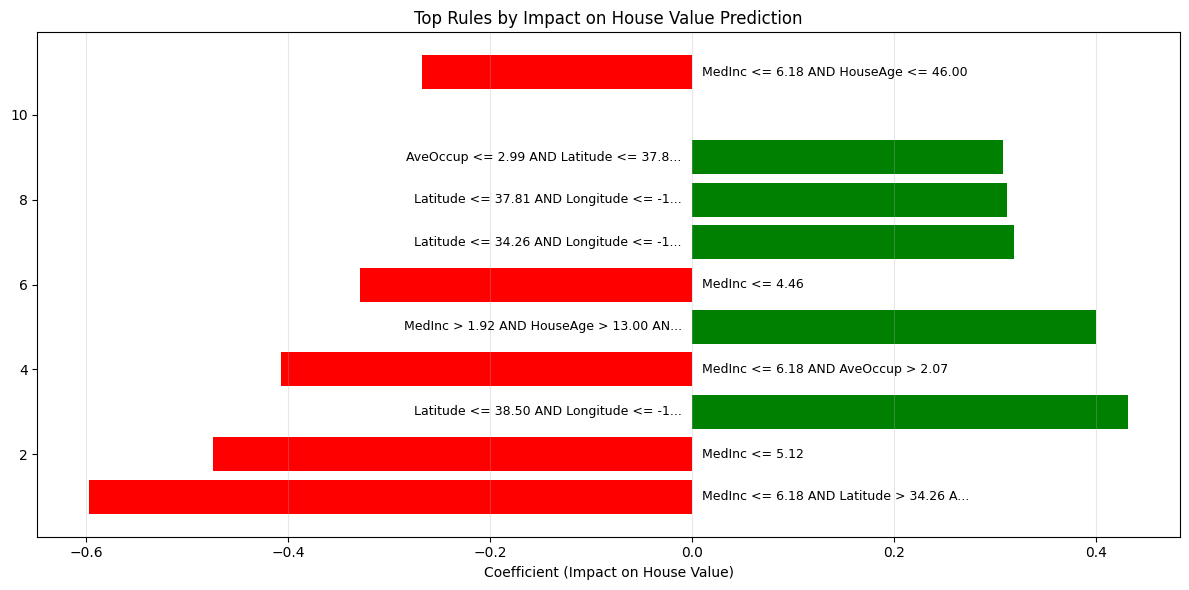

In [23]:
# Visualize rule impacts
plt.figure(figsize=(12, 6))

# Combine top positive and negative rules
top_rules = pd.concat([top_positive_rules, top_negative_rules])

# Plot horizontal bar chart
bars = plt.barh(
    top_rules.index, 
    top_rules['coefficient'],
    color=['green' if x > 0 else 'red' for x in top_rules['coefficient']]
)

# Add rule text as labels
for idx, bar in enumerate(bars):
    rule_idx = top_rules.index[idx]
    rule_text = top_rules.loc[rule_idx, 'rule']
    # Truncate rule text if it's too long
    if len(rule_text) > 40:
        rule_text = rule_text[:37] + "..."
        
    # Position the text
    xpos = 0.01 if top_rules.iloc[idx]['coefficient'] < 0 else -0.01
    align = 'left' if top_rules.iloc[idx]['coefficient'] < 0 else 'right'
    
    plt.text(
        xpos, 
        bar.get_y() + bar.get_height()/2, 
        rule_text, 
        ha=align, 
        va='center', 
        color='black',
        fontsize=9
    )

plt.xlabel('Coefficient (Impact on House Value)')
plt.title('Top Rules by Impact on House Value Prediction')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

This chart shows the most influential rules in our housing price prediction model:

#### Positive Factors (Green Bars)
- **Location Is Key**: Rules with the highest positive impact involve specific geographic coordinates in California, particularly areas with latitude <= 38.50 and longitude <= -121.37
- **Combined Attributes**: Houses with moderate income (>1.92), established age (>13), and specific locations have substantial positive contributions to price

#### Negative Factors (Red Bars)
- **Income Limitations**: Rules with "MedInc <= 5.12" or "MedInc <= 6.18" have strong negative impacts on predicted house values
- **Combinations Matter**: The strongest negative impact (-0.5968) comes from a combination of moderate income (<=6.18) with specific location parameters

The visualization reveals how our model identifies complex relationships between features, showing that location coordinates combined with income thresholds are the primary drivers of California housing prices, aligning with real-world housing market dynamics.


### <a id='feature-contribution-visualization'></a>[Feature Contribution Visualization](#toc)

The `plot_feature_contribution` function creates a line graph that reveals exactly how each feature influences house prices across its entire range of values. Here's how it works:

- **Isolates rules for a specific feature**: It filters the model's rules to find ones that directly involve our feature of interest (like "HouseAge" or "MedInc").
- **Simulates all possible values**: The function creates 100 evenly spaced values spanning from the minimum to maximum of the feature in our dataset.
- **Calculates cumulative effects**: For each value in this range, it applies all relevant rules to calculate the total contribution to the house price prediction.
- **Maps thresholds to contributions**: When a value crosses a threshold in a rule (like "HouseAge > 20"), the graph shows a step change in contribution at exactly that point.


In [24]:
def plot_feature_contribution(explainer, X_train, feature_name, dfx, y_label='Contribution to prediction'):
    # Get the rules that contain only the specified feature
    feature_rules = dfx[dfx['rule'].str.contains(f"{feature_name} [<>]")]
    
    if feature_rules.empty:
        raise ValueError(f"No simple rules found for '{feature_name}' in the model explanation")
    
    # Create a range of values for the specified feature
    feature_range = np.linspace(X_train[feature_name].min(), X_train[feature_name].max(), 100)
    
    # Initialize contributions array
    contributions = np.zeros_like(feature_range)
    
    # For each rule involving this feature, apply its contribution
    for _, rule in feature_rules.iterrows():
        rule_text = rule['rule']
        coefficient = rule['coefficient']
        
        # Parse the rule to get the threshold and comparison operator
        if '<=' in rule_text:
            threshold = float(rule_text.split('<= ')[1].split(' ')[0])
            mask = feature_range <= threshold
        elif '>' in rule_text:
            threshold = float(rule_text.split('> ')[1].split(' ')[0])
            mask = feature_range > threshold
            
        contributions[mask] += coefficient
    
    # Plot the contributions
    plt.figure(figsize=(10, 6))
    plt.plot(feature_range, contributions)
    plt.xlabel(feature_name)
    plt.ylabel(y_label)
    plt.title(f'Feature Contribution Plot for {feature_name}')
    plt.grid(True, alpha=0.3)
    plt.show()

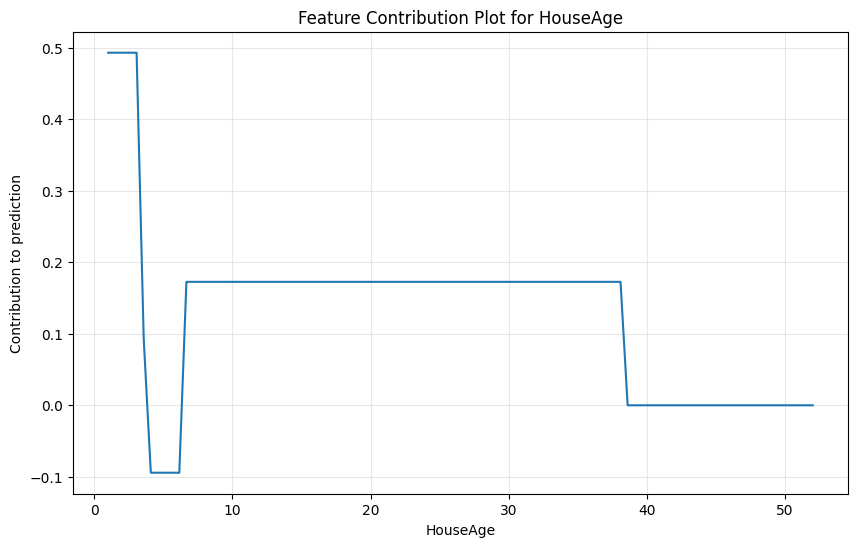

In [25]:
plot_feature_contribution(explainer, X_train, 'HouseAge', dfx)

The graph above shows how house age impacts property values across different age ranges in our model.

What we're seeing is a step function with distinct thresholds where the contribution to house prices changes dramatically:

- **Very new homes (0-5 years)**: These homes add approximately +0.5 to the prediction, equivalent to a \$50,000 premium over the baseline.
- **Homes between 5-9 years**: There's a sharp drop to around -0.1 (\$-10,000 impact), suggesting a significant depreciation after the initial "new home" premium disappears.
- **Homes between 9-38 years**: The contribution jumps back up to about +0.17 (\$17,000), indicating that moderately aged homes regain some value.
- **Homes older than 38 years**: The contribution drops to near zero, meaning these older homes neither add nor subtract significant value from the baseline prediction.

These patterns reveal interesting market dynamics:
1. **New construction premium**: Brand new homes command significant price premiums, likely due to modern features, warranties, and minimal maintenance needs.
2. **Early depreciation period**: Homes rapidly lose their "new" premium in years 5-9, possibly when initial warranties expire and first maintenance issues appear.
3. **Mature home stability**: Homes between 9-38 years maintain steady, positive contributions, suggesting these "established" homes have proven durability.
4. **Age neutrality point**: Beyond 38 years, age appears to stop being a significant factor in pricing.

This visualization transforms our complex rule set into an intuitive understanding of how house age affects property values, revealing specific thresholds that would be difficult to identify in traditional "black box" models.


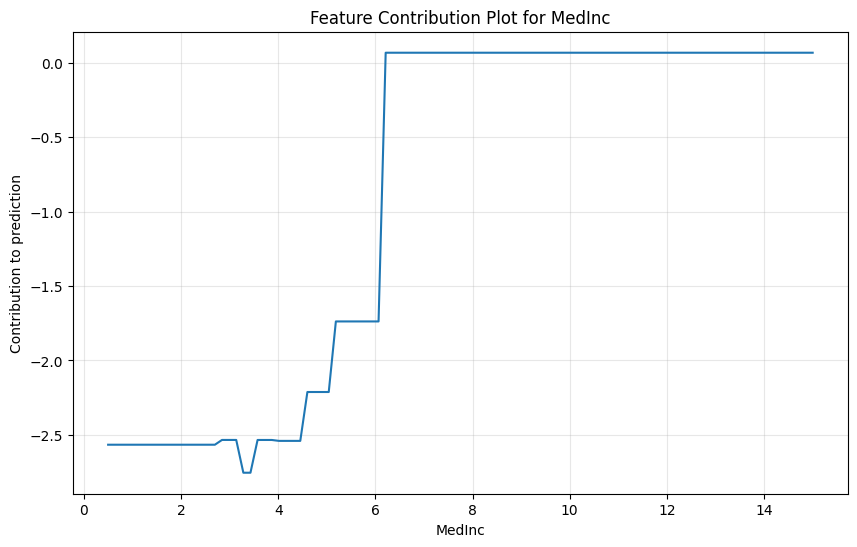

In [26]:
plot_feature_contribution(explainer, X_train, 'MedInc', dfx)

The graph above reveals the powerful relationship between neighborhood median income (MedInc) and house prices in our model. This visualization shows how different income levels affect property values across the entire range of income values in our dataset.

What this contribution plot shows:
- **Low-income areas (0-3 MedInc)**: These areas face a significant negative contribution of approximately -2.5, translating to a \$250,000 reduction in predicted house values.
- **Brief dip around 3-3.5 MedInc**: There's a temporary deeper depression to about -2.75 (\$-275,000).
- **Steady upward trend (3.5-6 MedInc)**: As median income increases, the negative contribution gradually diminishes, with clear step changes at specific income thresholds.
- **Critical threshold at 6 MedInc**: At this point, the contribution jumps dramatically to near zero.
- **Higher income areas (>6 MedInc)**: These areas have a neutral contribution, neither adding nor subtracting significantly from the base prediction.

Key insights from this pattern:
1. **Income is a dominant factor**: The steep steps and large magnitude of contributions (from -2.5 to 0) show that neighborhood income has one of the largest impacts on house prices in our model.
2. **Non-linear relationship**: The step function reveals that income doesn't affect prices uniformly—there are critical thresholds where small changes in neighborhood income lead to large jumps in property values.
3. **Ceiling effect**: Above the 6 MedInc threshold, further increases in median income don't significantly affect house prices, suggesting a saturation point where other factors become more important.
4. **Market segmentation**: The distinct steps might represent different market segments or buyer pools that operate at different price points.

This visualization confirms that neighborhood affluence is a primary driver of California housing prices, with properties in lower-income areas valued significantly lower, even when controlling for other housing characteristics like size, age, and location.
